In [349]:
import importlib
import gemplot
importlib.reload(gemplot)
from gemplot import *

In [350]:
import matplotlib.pyplot as mp
import matplotlib

import pandas
import geopandas
import cartopy
import pygsheets
import numpy
import textwrap

import itertools
import json

# import gemplot

In [351]:
from gemplot import *

# import data

In [352]:
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1lc4TxIQvPTgoFLBIGKADlgJXCZGLnx5_iBP91RDoedk')

In [353]:
lng_export_df = spreadsheet.worksheet('title', 'LNG Export Capacity').get_as_df(start='A5')
lng_import_df = spreadsheet.worksheet('title', 'LNG Import Capacity').get_as_df(start='A5')
gas_power_df = spreadsheet.worksheet('title', 'Gas Power Capacity').get_as_df(start='A5')

In [354]:
lng_export_df = lng_export_df.replace('',0)
lng_import_df = lng_import_df.replace('',0)
gas_power_df = gas_power_df.replace('',0)

/var/folders/fl/t07mc8053p33mn6mdmvp45580000gn/T/ipykernel_82060/3790412694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lng_export_df = lng_export_df.replace('',0)
/var/folders/fl/t07mc8053p33mn6mdmvp45580000gn/T/ipykernel_82060/3790412694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lng_import_df = lng_import_df.replace('',0)
/var/folders/fl/t07mc8053p33mn6mdmvp45580000gn/T/ipykernel_82060/3790412694.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

# gemplot variables
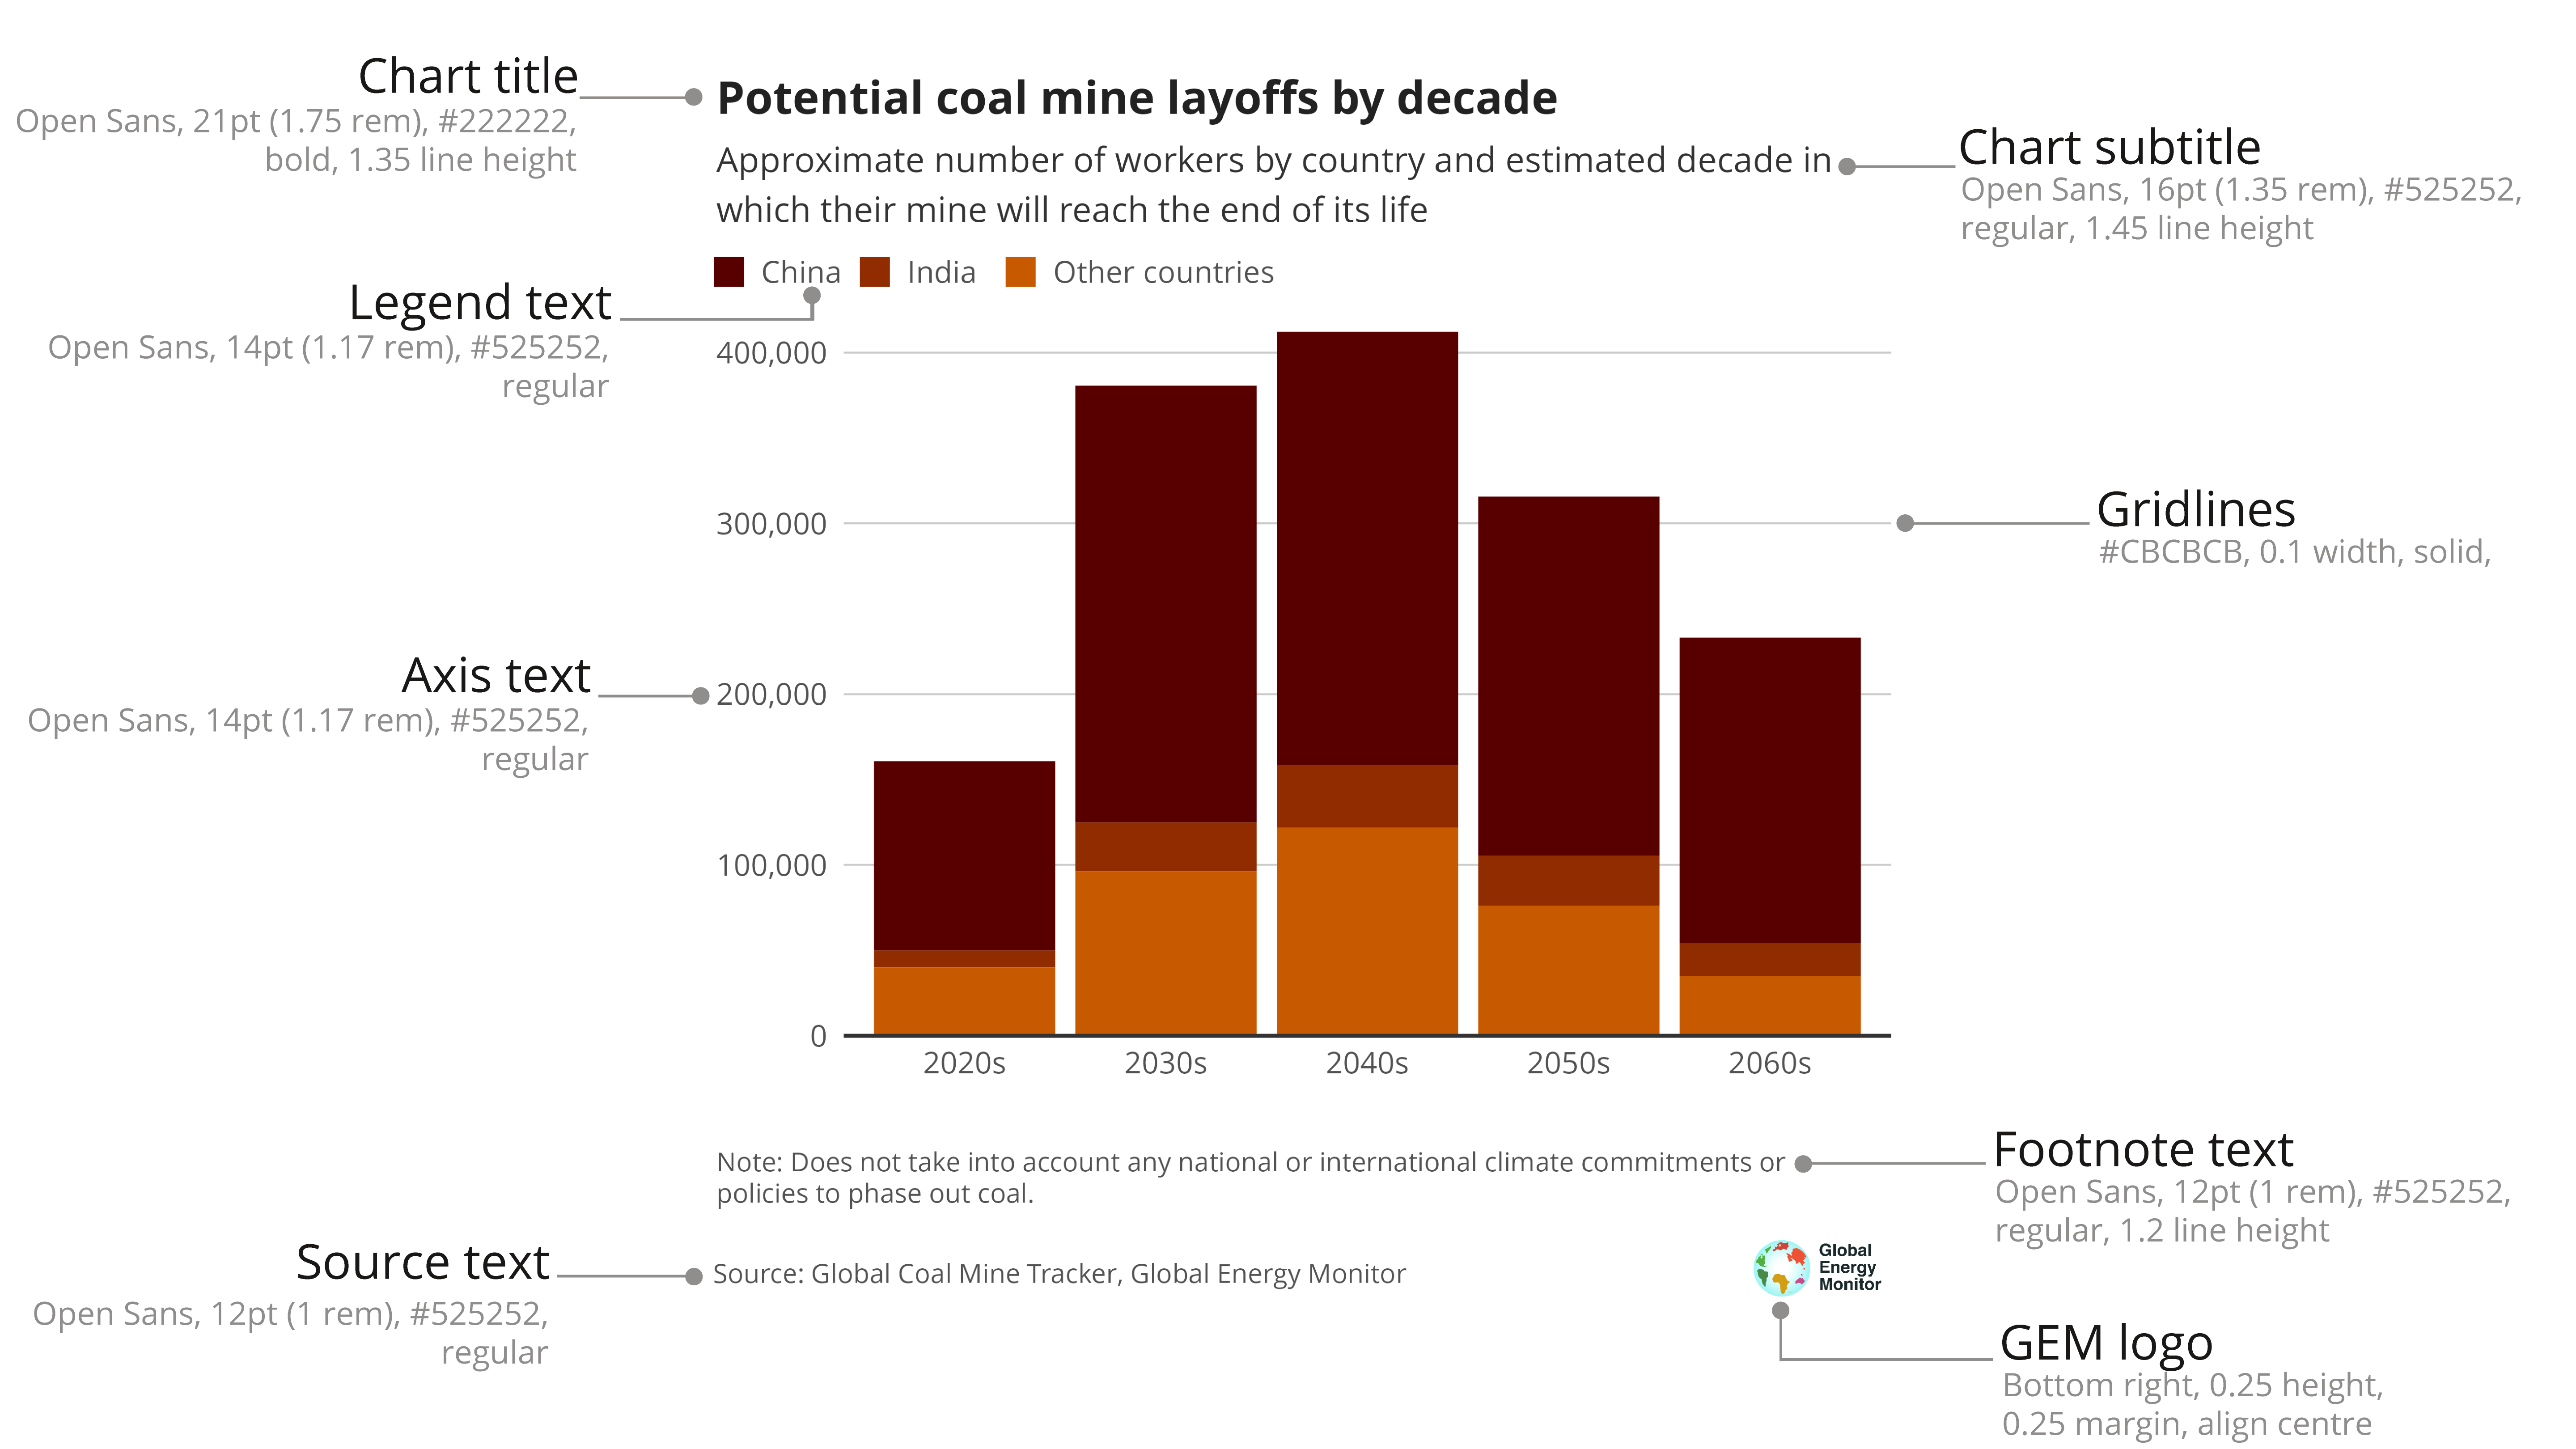

# gemplot colors

In [355]:
ff_palette = ["#580000", "#902C00", "#BF532C", "#F98C28", "#FFD370"]
purple_palette = ["#392E66", "#4F408C", "#7468A4", "#9A91BD", "#BFBAD5"]

gp_op = purple_palette[0]
gp_con = purple_palette[1]
gp_precon = purple_palette[2]
gp_ann = purple_palette[3]

lng_op = ff_palette[1]
lng_con = ff_palette[2]
lng_prop = ff_palette[3]

# figure 1 for ALL of SE Asia

In [356]:
countries = ['Vietnam',
             'Philippines',
             'Thailand',
             'Indonesia',
             'Malaysia']

all_countries = ['Brunei Darussalam',
 'Cambodia',
 'Indonesia',
 "Lao People's Democratic Republic",
 'Malaysia',
 'Myanmar',
 'Philippines',
 'Singapore',
 'Thailand',
 'Timor-Leste',
 'Vietnam']

#gas_power_df.sort_values('In Development (Announced + Pre-construction + Construction)', ascending=False).Country.to_list()
all_countries_sorted = [
 'Vietnam',
 'Philippines',
 'Indonesia',
 'Thailand',
 'Malaysia',
 'Myanmar',
 'Singapore',
 'Cambodia',
 'Brunei Darussalam',
 "Lao People's Democratic Republic",
 'Timor-Leste'
]

# figure 1 - simpler labels

continuous y-axis

# figure 1 - final

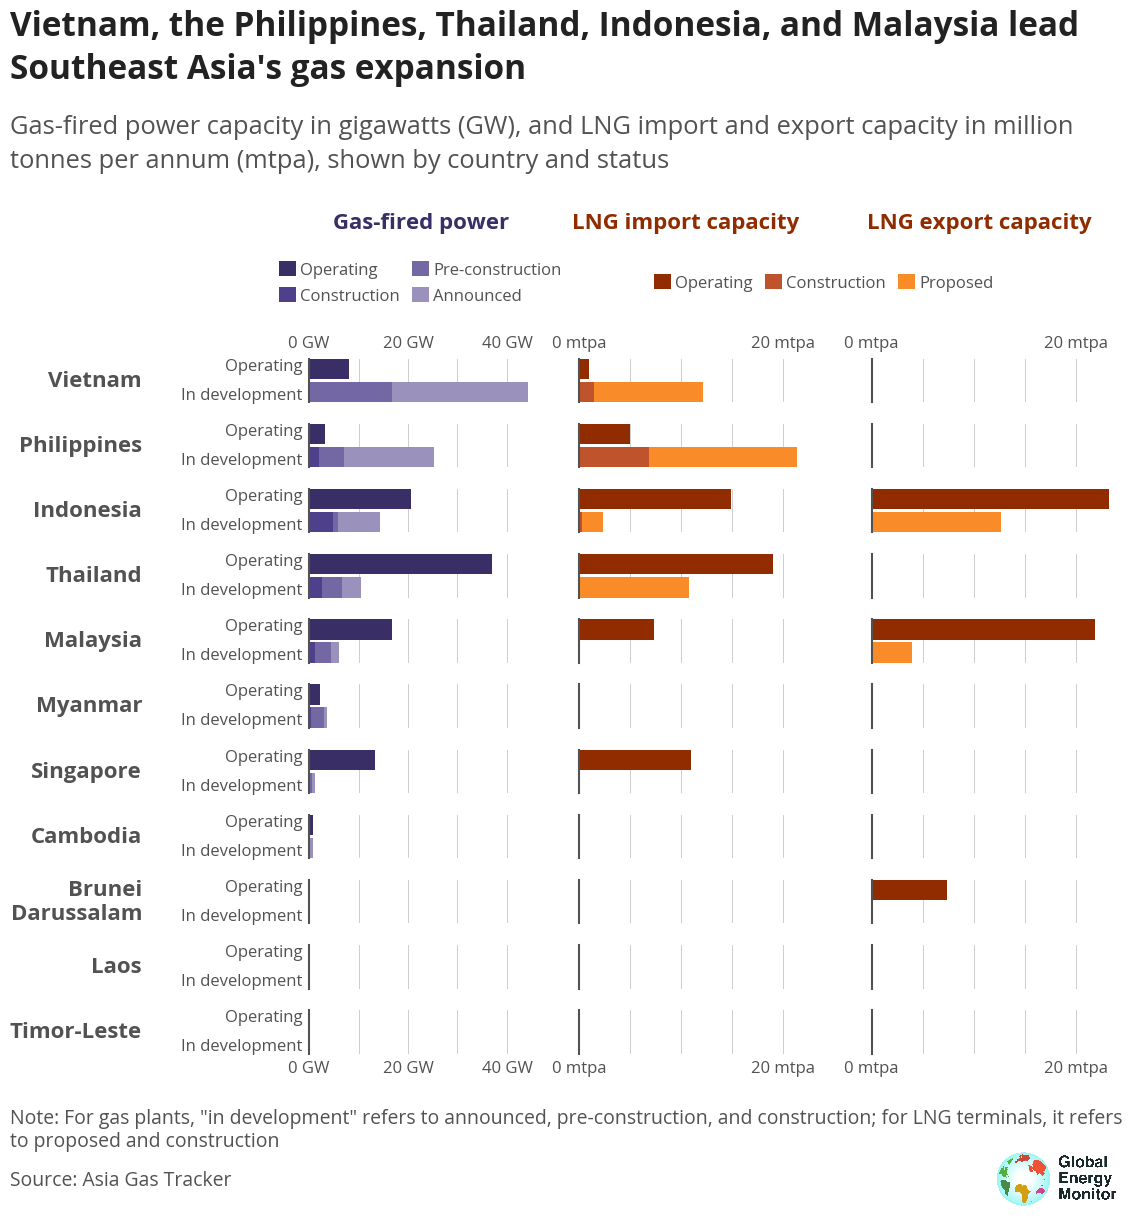

In [392]:
fig = mp.figure(figsize=(750/72, 650/72))
gs = matplotlib.gridspec.GridSpec(11, 3, width_ratios=[1,1.1,1.1])

bar_height = 0.4
y_pos = 0.22

# do gas plants
for idx,country in enumerate(all_countries_sorted):
    ax = fig.add_subplot(gs[3*idx])
    if country=="Lao People's Democratic Republic":
        ax.text(x=-.75,y=0.5,
                s=textwrap.fill('Laos',13),
                transform=ax.transAxes,
                size=font_size_axis,
                ha='right',
                va='center',
                color=color_subtitle_text,
                weight=text_weight_bold)
    else:
        ax.text(x=-.75,y=0.5,
                s=textwrap.fill(country,13),
                transform=ax.transAxes,
                size=font_size_axis,
                ha='right',
                va='center',
                color=color_subtitle_text,
                weight=text_weight_bold)
    if idx==0:
        ax.text(x=0.9,y=4,s='Gas-fired power',
                transform=ax.transAxes,
                size=font_size_axis,
                weight=text_weight_bold,
                color=gp_op,
                ha='right')
        save_first_axis = ax
    if idx==1:
        save_second_axis = ax
    # if idx==3:
    #     save_fourth_axis = ax
    if idx==10:
        save_bottom_left_axis = ax
    if idx==8:
        save_ninth_axis = ax
    # plot operating
    ax.barh(y=y_pos,
            width=gas_power_df.loc[gas_power_df.Country==country,'Operating']/1000,
            height=bar_height,
            color=gp_op, zorder=1, label='Operating')
    ax.barh(y=-y_pos,
            width=gas_power_df.loc[gas_power_df.Country==country,'Construction']/1000,
            height=bar_height,
            color=gp_con, label='Construction')
    ax.barh(y=-y_pos,
            width=gas_power_df.loc[gas_power_df.Country==country,'Pre-construction']/1000,
            left=gas_power_df.loc[gas_power_df.Country==country,'Construction']/1000,
            height=bar_height,
            color=gp_precon, label='Pre-construction')
    ax.barh(y=-y_pos,   
            width=gas_power_df.loc[gas_power_df.Country==country,'Announced']/1000,
            left=gas_power_df.loc[gas_power_df.Country==country,['Construction','Pre-construction']].sum(axis=1)/1000,
            height=bar_height,
            color=gp_ann, label='Announced')
    #ax.minorticks_on()
    gemplot_axes(ax=ax, fig=fig)
    gemplot_grid(ax=ax, which='both', xyaxis='x')
    # ax.axvline(x=10,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    # ax.axvline(x=20,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    # ax.axvline(x=30,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    # ax.axvline(x=40,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    gemplot_left_axis(ax=ax)

    ax.set_xlim(0,45)
    
    ax.set_ylim(-y_pos*1.5,y_pos*1.5)
    ax.set_xticks([0,20,40])    
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    
    ax.set_yticks([-y_pos,y_pos])
    ax.set_yticklabels(['In development','Operating'], va='center')
    
    if idx==0:
        ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d GW'))
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
        ax.xaxis.set_tick_params(labelbottom=False, labeltop=True)
    elif idx==10:
        ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d GW'))
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
    else:
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
        ax.set_xticklabels([])
    ax.tick_params(labelsize=1.3331*base_size/1.3331, colors=color_axis_text)




# LEGEND FOR GAS PLANTS
ax_bbox = save_first_axis.get_tightbbox()
x_loc,y_loc = save_first_axis.transAxes.inverted().transform([ax_bbox.x0, ax_bbox.y1])
handles,labels = save_first_axis.get_legend_handles_labels()

legend = save_first_axis.legend(
          handles=handles,
          labels=labels,
          fontsize=base_size,
          frameon=False,
          loc='center',
          bbox_to_anchor=(0.5,2.75),
          bbox_transform=save_first_axis.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=2,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)
for text in legend.get_texts():
    text.set_color(color_axis_text)













# do LNG imports
for idx,country in enumerate(all_countries_sorted):
    # if country in ['Vietnam']:
    #     continue
    ax = fig.add_subplot(gs[3*idx+1])
    if idx==0:
        ax.text(x=0.9,y=4,s='LNG import capacity',
                transform=ax.transAxes,
                size=font_size_axis,
                weight=text_weight_bold,
                color=lng_op,
                ha='right')
        save_first_middle_axis = ax
    # plot operating
    ax.barh(y=y_pos,
            width=lng_import_df.loc[lng_import_df.Country==country,'Operating'],
            height=bar_height,
            color=lng_op, zorder=1, label='Operating')
    ax.barh(y=-y_pos,
            width=lng_import_df.loc[lng_import_df.Country==country,'Construction'],
            height=bar_height,
            color=lng_con, label='Construction')
    ax.barh(y=-y_pos,
            width=lng_import_df.loc[lng_import_df.Country==country,'Proposed'],
            left=lng_import_df.loc[lng_import_df.Country==country,'Construction'],
            height=bar_height,
            color=lng_prop, label='Proposed')
    
    #ax.minorticks_on()
    gemplot_axes(ax=ax, fig=fig)
    gemplot_grid(ax=ax, which='both', xyaxis='x')
    # ax.axvline(x=5,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    # ax.axvline(x=10,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    # ax.axvline(x=15,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    # ax.axvline(x=20,ymin=.15, ymax=.85,lw=thickness_gridlines,color=color_gridlines,zorder=-1)
    gemplot_left_axis(ax=ax)
    
    ax.set_xlim(0,24)
    ax.set_ylim(-y_pos*1.5,y_pos*1.5)
    ax.set_xticks([0,20])    
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(4))
    ax.set_yticks([-y_pos,y_pos])
    ax.set_yticklabels([])
    
    if idx==0:
        ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d mtpa'))
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
        ax.xaxis.set_tick_params(labelbottom=False, labeltop=True)
    elif idx==10:
        ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d mtpa'))
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
    else:
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
        ax.set_xticklabels([])
    ax.tick_params(labelsize=1.3331*base_size/1.3331, colors=color_axis_text)




# LEGEND FOR LNG TERMINALS
ax_bbox = save_first_middle_axis.get_tightbbox()
x_loc,y_loc = save_first_middle_axis.transAxes.inverted().transform([ax_bbox.x0, ax_bbox.y1])
handles,labels = save_first_middle_axis.get_legend_handles_labels()

legend = save_first_middle_axis.legend(
          handles=handles,
          labels=labels,
          fontsize=base_size,
          frameon=False,
          loc='center',
          bbox_to_anchor=(1,2.75),
          bbox_transform=save_first_middle_axis.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=3,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)
for text in legend.get_texts():
    text.set_color(color_axis_text)










# do LNG exports
for idx,country in enumerate(all_countries_sorted):
    # if country in ['Vietnam','Philippines','Thailand']:
    #     continue
    ax = fig.add_subplot(gs[3*idx+2])
    if idx==0:
        ax.text(x=0.9,y=4,s='LNG export capacity',
                transform=ax.transAxes,
                size=font_size_axis,
                weight=text_weight_bold,
                color=lng_op,
                ha='right')
    if idx==10:
        save_bottom_right_axis = ax
    # plot operating
    ax.barh(y=y_pos,
            width=lng_export_df.loc[lng_export_df.Country==country,'Operating'],
            height=bar_height,
            color=lng_op, zorder=1)
    ax.barh(y=-y_pos,
            width=lng_export_df.loc[lng_export_df.Country==country,'Construction'],
            height=bar_height,
            color=lng_con)
    ax.barh(y=-y_pos,
            width=lng_export_df.loc[lng_export_df.Country==country,'Proposed'],
            left=lng_export_df.loc[lng_export_df.Country==country,'Construction'],
            height=bar_height,
            color=lng_prop)

    gemplot_axes(ax=ax, fig=fig)
    gemplot_grid(ax=ax, which='both', xyaxis='x')
    
    gemplot_left_axis(ax=ax)
    
    ax.set_xlim(0,24)
    ax.set_ylim(-y_pos*1.5,y_pos*1.5)
    ax.set_xticks([0,20])    
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(4))

    ax.set_yticks([-y_pos,y_pos])
    ax.set_yticklabels([])
    if idx==0:
        ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d mtpa'))
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
        ax.xaxis.set_tick_params(labelbottom=False, labeltop=True)
    elif idx==10:
        ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d mtpa'))
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
    else:
        ax.tick_params(pad=5)
        ax.tick_params(which='minor', size=0)
        ax.set_xticklabels([])
        
    ax.tick_params(labelsize=1.3331*base_size/1.3331, colors=color_axis_text)

mp.subplots_adjust(hspace=0.5, wspace=0.2)


# ADD TITLE AND SUBTITLE
# now get tight bbox again for further placement AFTER legend is added
#bbox = save_first_axis.get_tightbbox()
bbox = legend.get_tightbbox()
bbox2 = save_bottom_left_axis.get_tightbbox()
x_location,y_location = save_first_axis.transAxes.inverted().transform([bbox.x0, bbox.y1])
x_location2,y_location2 = save_bottom_left_axis.transAxes.inverted().transform([bbox2.x0, bbox2.y1])

subtitle_text = fig.text(s=textwrap.fill('Gas-fired power capacity in gigawatts (GW), \
and LNG import and export capacity in million tonnes per annum (mtpa), shown by country and status',90),
        size=font_size_subtitle,
        color=color_subtitle_text,
        x=x_location2,
        y=y_location2+4.25,
        ha='left',
        va='bottom',
        weight=text_weight_normal,
        transform=save_first_axis.transAxes,
        linespacing=line_height_subtitle,
        wrap=False)

fig.text(s=textwrap.fill("Vietnam, the Philippines, Thailand, Indonesia, \
and Malaysia lead Southeast Asia's gas expansion",65),
        size=font_size_title,
        color=color_title_text,
        x=x_location2,
        y=y_location2+6.25,
        ha='left',
        va='bottom',
        weight=text_weight_bold,
        transform=save_first_axis.transAxes,
        linespacing=line_height_title,
        wrap=False)

# GEM NOTE
bbox = save_bottom_left_axis.get_tightbbox()
x_loc,y_loc = save_bottom_left_axis.transAxes.inverted().transform([bbox.x0, bbox.y0])
note_text = textwrap.fill('Note: For gas plants, "in development" refers to announced, \
pre-construction, and construction; for LNG terminals, \
it refers to proposed and construction',125)
save_bottom_left_axis.text(s=note_text,
                           size=font_size_footnote,
                           color=color_footnote_text,
                           x=x_loc,
                           y=-1.75,
                           ha='left',
                           va='center',
                           weight=text_weight_normal,
                           transform=save_bottom_left_axis.transAxes,
                           linespacing=line_height_footnote,
                           wrap=False)


# GEM LOGO AND NOTES
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corner
                                                          xycoords='axes fraction',
                                                          box_alignment=(1.,2.5), 
                                                          frameon=False)
save_bottom_right_axis.add_artist(logo_annotation_box)
gem_logo_bbox = logo_annotation_box.get_tightbbox()

bbox = save_bottom_left_axis.get_tightbbox()
x_loc,y_loc = save_bottom_left_axis.transAxes.inverted().transform([bbox.x0, bbox.y0])
logo_x0_loc,logo_y0_loc = save_bottom_right_axis.transAxes.inverted().transform([gem_logo_bbox.x0,gem_logo_bbox.y0])
logo_x1_loc,logo_y1_loc = save_bottom_right_axis.transAxes.inverted().transform([gem_logo_bbox.x1,gem_logo_bbox.y1])

footer_text = 'Source: Asia Gas Tracker'
save_bottom_left_axis.text(s=footer_text,
                           size=font_size_footnote,
                           color=color_footnote_text,
                           x=x_loc,
                           y=(logo_y0_loc+logo_y1_loc)/2,
                           ha='left',
                           va='center',
                           weight=text_weight_normal,
                           transform=save_bottom_left_axis.transAxes,
                           linespacing=line_height_footnote,
                           wrap=False)

fig.savefig('../figures/figure1-with-all-countries-simpler-labels.png', dpi=300, bbox_inches='tight')
fig.savefig('../figures/figure1-with-all-countries-simpler-labels.pdf', bbox_inches='tight')

# figure 8

In [359]:
#pandas.read_json('../wpd_project-extracted-for-asia-gas-tracker-report-2024/wpd.json')
with open('../wpd_project-extracted-for-asia-gas-tracker-report-2024/wpd.json') as json_data:
    data = json.load(json_data)
    #df = pandas.DataFrame(data)
    #df['lyrics']

In [360]:
country_abbrevs = ['viet','phil','thai','indo','mal']
type_abbrevs = ['gas','wind','solar']
data_abbrevs = ['min','bench','max']

iterated_list = list(itertools.product(country_abbrevs,type_abbrevs,data_abbrevs))
iterated_list = [''.join([ele+'-' for ele in i])[:-1] for i in iterated_list]

iterated_list.remove('mal-gas-min')
iterated_list.remove('mal-gas-max')
iterated_list.remove('mal-gas-bench')

In [361]:
data_df = pandas.DataFrame(data['datasetColl'][0]['data'])
#data_df.metadata = data_df.metadata.str.split(': ')

data_df.metadata = [d.get('label') for d in data_df.metadata]
data_df.value = [v[0] for v in data_df.value]

In [362]:
data_df.head()

x           y        metadata       value
0  121.328622  450.063604    indo-gas-max  107.299270
1  121.328622  471.378092    indo-gas-min   90.693431
2  121.328622  463.180212  indo-gas-bench   97.080292
3  194.289753  323.816254   indo-wind-max  205.656934
4  194.289753  463.180212   indo-wind-min   97.080292

In [363]:
browns = ["#580000", "#902C00", "#BF532C", "#F98C28", "#FFD370"]
greens = ["#1F3428", "#3F6950", "#5F9E79", "#94BEA5", "#C9DED2"]
blues = ["#002970", "#00509F", "#457BD1", "#7CABE8", "#B2DBFF"]

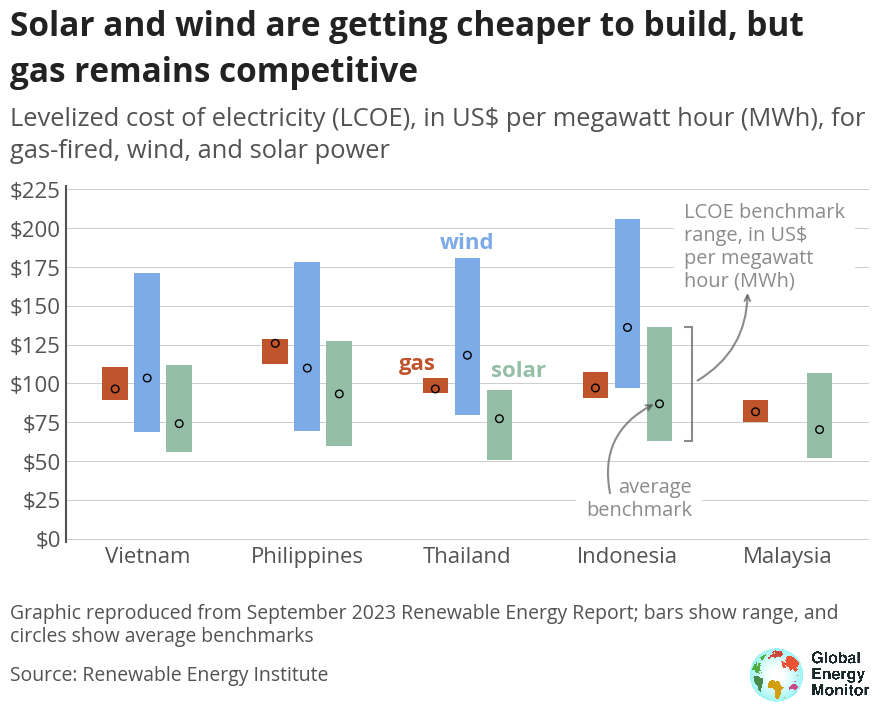

In [371]:
fig = mp.figure(figsize=(width_pixels/72,height_pixels/72/1.5)) # 640x300

ax = fig.add_subplot(111)

x_idx = 0
x_vals = [0,5,10,15,20]
t_vals = [1,2,3]
all_xvals = []
all_benchvals = []
t_colors = [browns[2],
            blues[3],
            greens[3]]

for c_idx,country in enumerate(country_abbrevs):
    xval0 = x_vals[c_idx]
    for t_idx,t in enumerate(type_abbrevs):
        if (country=='mal' and t=='wind'):
            continue
        else:
            minval = data_df.loc[data_df.metadata==country+'-'+t+'-min']['value'].values[0]
            maxval = data_df.loc[data_df.metadata==country+'-'+t+'-max']['value'].values[0]
            benchval = data_df.loc[data_df.metadata==country+'-'+t+'-bench']['value'].values[0]
            ax.bar(x=xval0+t_vals[t_idx],
                   height = maxval-minval,
                   bottom = minval,
                   color = t_colors[t_idx])
            all_xvals.append(xval0+t_vals[t_idx])
            all_benchvals.append(benchval)

ax.scatter(all_xvals,
           all_benchvals,
           s=30, 
           marker='o', 
           facecolor='None', 
           edgecolor='0')

ax.set_xticks(numpy.array(x_vals)+2)
ax.set_xticklabels(['Vietnam','Philippines','Thailand','Indonesia','Malaysia'])

ax.set_ylim(0,225)

ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('$%d'))
ax.yaxis.set_ticks(numpy.arange(0,226,25))
#ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax.set_ylim(-2,227)

gemplot_grid(ax=ax, xyaxis='y')
gemplot_axes(ax=ax, fig=fig)
gemplot_left_axis(ax=ax)

fig.tight_layout()
# add title and footer info
title_text_to_use = textwrap.fill('Solar and wind are getting cheaper to build, but gas remains competitive',50)
subtitle_text_to_use = textwrap.fill('Levelized cost of electricity (LCOE), in US$ per megawatt hour (MWh), for \
gas-fired, wind, and solar power',75)

gemplot_title_subtitle(ax=ax,
                   fig=fig,
                   title_text=title_text_to_use,
                   subtitle_text=subtitle_text_to_use,
                   vertical_shift=0.05)

footer_text_to_use = "Source: Renewable Energy Institute"

notes_text_to_use = textwrap.fill("Graphic reproduced from September 2023 \
Renewable Energy Report; bars show range, and circles show average benchmarks",85)

gemplot_note(ax=ax,
             fig=fig,
             note_text=notes_text_to_use,
             note_position=0.1)
gemplot_footer(ax=ax,
               fig=fig,
               footer_text=footer_text_to_use,
               footer_position=1.75)

ax.text(s='gas',
        color=t_colors[0],
        x=0.46,
        y=0.47,
        transform=ax.transAxes,
        ha='right',
        va='bottom',
        size=font_size_axis,
        weight=text_weight_bold)

ax.text(s='wind',
        color=t_colors[1],
        x=0.5,
        y=0.81,
        transform=ax.transAxes,
        ha='center',
        va='bottom',
        size=font_size_axis,
        weight=text_weight_bold)

ax.text(s='solar',
        color=t_colors[2],
        x=0.53,
        y=0.45,
        transform=ax.transAxes,
        ha='left',
        va='bottom',
        size=font_size_axis,
        weight=text_weight_bold)



# ADD BRACKET
spine_pos=.78; tip_pos=0.77
bracket_low = 'indo-solar-min'
bracket_high = 'indo-solar-max'
top = data_df.loc[data_df.metadata=='indo-solar-max']['value'].values[0]
bottom = data_df.loc[data_df.metadata=='indo-solar-min']['value'].values[0]
transform = ax.get_yaxis_transform()

# add the bracket
bracket = matplotlib.patches.PathPatch(
    matplotlib.path.Path(
        [
            [tip_pos, top],
            [spine_pos, top],
            [spine_pos, bottom],
            [tip_pos, bottom],
        ]
    ),
    transform=transform,
    clip_on=False,
    facecolor="none",
    edgecolor=color_footnote_text,
    linewidth=thickness_emphasize_axis,
    alpha=0.666
)
ax.add_artist(bracket)

t1 = ax.text(s='LCOE benchmark\nrange, in US$\nper megawatt\nhour (MWh)',
        x=0.77,
        y=0.83,
        ha='left',
        va='center',
        transform=ax.transAxes,
        fontsize=font_size_axis*0.9,
        color=color_footnote_text, alpha=0.666)

t2 = ax.text(s='average\nbenchmark',
        x=0.78,
        y=0.075,
        transform=ax.transAxes,
        fontsize=font_size_axis*0.9,
        color=color_footnote_text,
        ha='right', alpha=0.666)

t1.set_bbox(dict(facecolor='white', alpha=1, edgecolor='None', boxstyle='square,pad=.5'))
t2.set_bbox(dict(facecolor='white', alpha=1, edgecolor='None', boxstyle='square,pad=.5'))


range_arrow_end = [20.75,160]
range_arrow_start = [19,0.5*(top+bottom)]

avg_arrow_end = [17.9,87.5]
avg_arrow_start = [16.5,25]

ax.annotate("",
             xy=range_arrow_start,
             xycoords='data',
             xytext=range_arrow_end,
             textcoords='data',
             arrowprops=dict(arrowstyle="<-", 
                             connectionstyle="arc3,rad=-0.3",
                             shrinkB=5,
                             color=color_footnote_text,
                             lw=thickness_emphasize_axis, alpha=0.666)
            )

ax.annotate("",
             xy=avg_arrow_start,
             xycoords='data',
             xytext=avg_arrow_end,
             textcoords='data',
             arrowprops=dict(arrowstyle="<-", 
                             connectionstyle="arc3,rad=0.4",
                             shrinkB=5,
                             color=color_footnote_text,
                             lw=thickness_emphasize_axis, alpha=0.666)
            )





fig.savefig('../figures/figure7-lcoe.png',
            dpi=300,
            bbox_inches='tight',
            transparent=False)

fig.savefig('../figures/figure7-lcoe.pdf', 
            bbox_inches='tight',
            transparent=False)

# figure 7

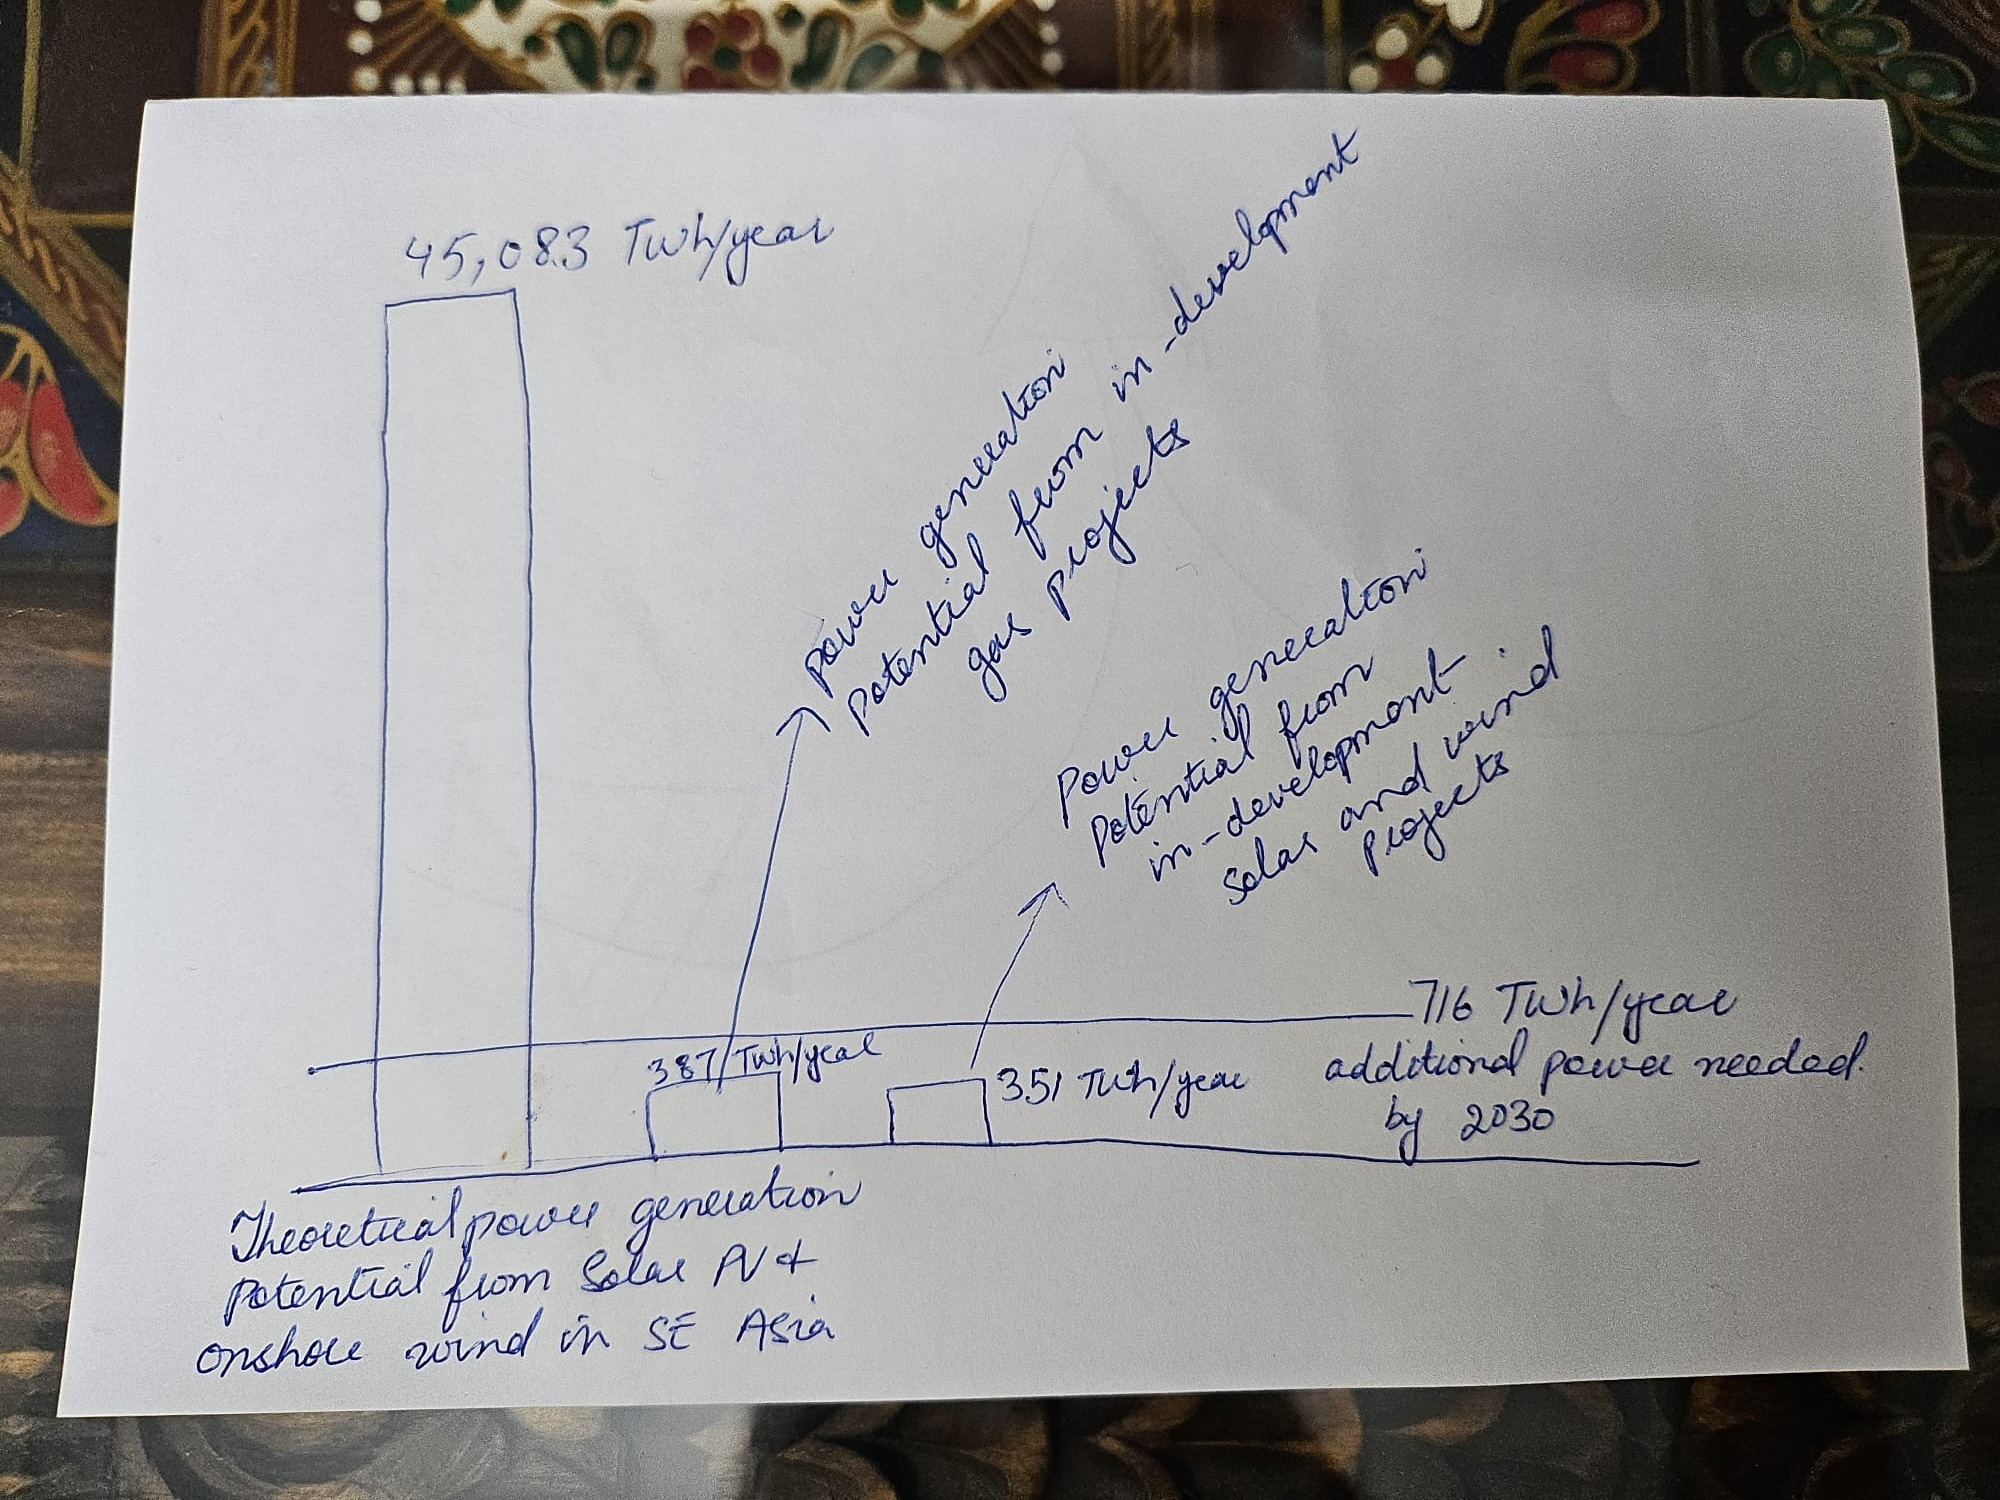

Text(4, 480, '')

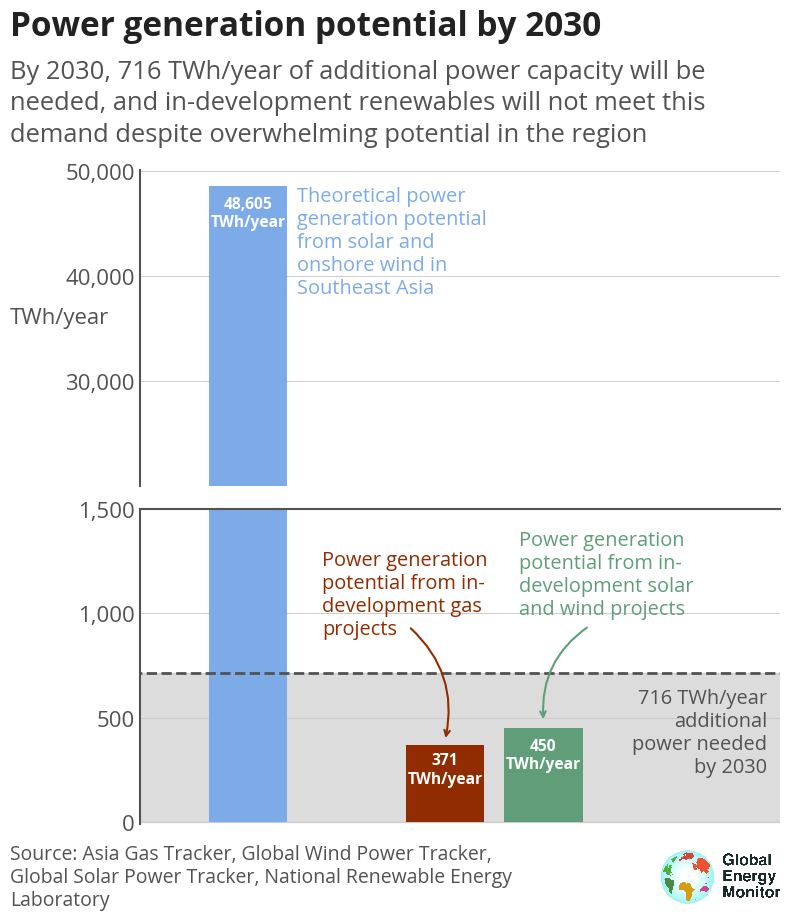

In [216]:
fig = mp.figure(figsize=(width_pixels/80,height_pixels*1.25/80))

font_size_axis = 1.3331*base_size

power_theoretical = 48605 # TWh/year
power_theoretical_text = 'Theoretical power generation potential from solar and onshore wind in Southeast Asia'
gas_in_dev_potential = 371 # TWh/year
gas_in_dev_potential_text = 'Power generation potential from in-development gas projects'
solar_wind_in_dev_potential = 450 # TWh/year
solar_wind_in_dev_potential_text = 'Power generation potential from in-development solar and wind projects'
demand_by_2030 = 716 # TWh/year
demand_by_2030_text = 'additional power needed by 2030'

ax1 = fig.add_subplot(211)#, frameon=False)
ax2 = fig.add_subplot(212, sharex=ax1)#, frameon=False)

# theoretical power
#ax.bar
ax1.bar(x = [1,3,4],
        height = [power_theoretical, gas_in_dev_potential, solar_wind_in_dev_potential],
        color = [blues[3],browns[1],greens[2]])

ax2.bar(x = [1,3,4],
        height = [power_theoretical, gas_in_dev_potential, solar_wind_in_dev_potential],
        color = [blues[3],browns[1],greens[2]])

ax1.set_ylim(20000,50100)
ax2.set_ylim(-10,1500)
ax1.set_xlim(-.1,6.4)

ax1.set_ylabel('TWh/year',
              fontsize=font_size_axis,
              color=color_axis_text,
              y=0.1,
              #x=-1,
              ha='left',
              rotation=0,
              )

gemplot_grid(ax=ax1, xyaxis='y')
gemplot_grid(ax=ax2, xyaxis='y')

gemplot_left_axis(ax=ax1)
gemplot_left_axis(ax=ax2)

gemplot_axes(ax=ax1, fig=fig)
gemplot_axes(ax=ax2, fig=fig)

ax1.set_xticks([])
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_color(color_axis_text)
ax2.spines['top'].set_linewidth(thickness_emphasize_axis)

ax1.set_yticks([30000,40000,50000])

ax2.hlines(y=demand_by_2030,
           xmin=-10,
           xmax=10, lw=2, 
           ls='--',
           color=color_axis_text)

#####################
#####################
#####################
#####################
ax2.text(x=ax2.get_xlim()[1]*0.98,
         y=demand_by_2030*0.9,
         s='{:,.0f}'.format(demand_by_2030)+' TWh/year\n'+textwrap.fill(demand_by_2030_text,13),
         ha='right',
         va='top',
         color=color_axis_text,
         fontsize=font_size_axis*.9,
         weight=text_weight_normal)
         
ax1.text(x=1.5,
         y=power_theoretical,
         s=textwrap.fill(power_theoretical_text,20),
         ha='left',
         va='top',
         color=blues[3],
         fontsize=font_size_axis*.9,
         weight=text_weight_normal)

ax2.text(x=1.75,
         y=1300,
         s=textwrap.fill(gas_in_dev_potential_text,20),
         ha='left',
         va='top',
         color=browns[1],
         fontsize=font_size_axis*.9,
         weight=text_weight_normal)

ax2.text(x=3.75,
         y=1400,
         s=textwrap.fill(solar_wind_in_dev_potential_text,20),
         ha='left',
         va='top',
         color=greens[2],
         fontsize=font_size_axis*.9,
         weight=text_weight_normal)

#####################
#####################
#####################
#####################
# text inside bars
ax1.text(x=1,
         y=power_theoretical*0.98,
         s='{:,.0f}'.format(power_theoretical)+'\nTWh/year\n',
         ha='center',
         va='top',
         color='1',
         fontsize=font_size_axis*0.7,
         weight=text_weight_bold)

ax2.text(x=3,
         y=gas_in_dev_potential*0.9,
         s='{:,.0f}'.format(gas_in_dev_potential)+'\nTWh/year\n',
         ha='center',
         va='top',
         color='1',
         fontsize=font_size_axis*0.7,
         weight=text_weight_bold)

ax2.text(x=4,
         y=solar_wind_in_dev_potential*0.9,
         s='{:,.0f}'.format(solar_wind_in_dev_potential)+'\nTWh/year\n',
         ha='center',
         va='top',
         color='1',
         fontsize=font_size_axis*0.7,
         weight=text_weight_bold)

ax2.fill_between(x=[-10,10],
                 y1=0,
                 y2=demand_by_2030,
                 color=color_axis_text,
                 alpha=0.2,
                 zorder=0)


#####################
#####################
#####################
#####################
ax1.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_yticks(numpy.arange(0,1501,500))

fig.tight_layout()


#####################
#####################
#####################
#####################
#add title and footer info
title_text_to_use = 'Power generation potential by 2030'
subtitle_text_to_use = textwrap.fill('By 2030, 716 TWh/year of additional \
power capacity will be needed, and in-development renewables will not meet \
this demand despite overwhelming potential in the region',60)

gemplot_title_subtitle(ax=ax1,
                   fig=fig,
                   title_text=title_text_to_use,
                   subtitle_text=subtitle_text_to_use,
                   vertical_shift=0.05)

footer_text_to_use = (textwrap.fill('Source: Asia Gas Tracker, Global Wind Power Tracker, \
Global Solar Power Tracker, National Renewable Energy Laboratory',55))

# import GEM logo
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
footer_position = 1.333
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corder
                                                          xycoords='axes fraction',
                                                          box_alignment=(1,1*footer_position),
                                                          pad=0,
                                                          annotation_clip=False,
                                                          frameon=False,
                                                          )
ax2.add_artist(logo_annotation_box)
gem_logo_bbox = logo_annotation_box.get_tightbbox()
ax_bbox = ax1.get_tightbbox()
x_loc,y_loc = ax1.transAxes.inverted().transform([ax_bbox.x0,ax_bbox.y0])
logo_x0_loc,logo_y0_loc = ax1.transAxes.inverted().transform([gem_logo_bbox.x0,gem_logo_bbox.y0])
logo_x1_loc,logo_y1_loc = ax1.transAxes.inverted().transform([gem_logo_bbox.x1,gem_logo_bbox.y1])
ax2.text(s=footer_text_to_use,
        size=font_size_footnote,
        color=color_footnote_text,
        x=x_loc,
        y=(logo_y0_loc+logo_y1_loc)/2,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax1.transAxes,
        linespacing=line_height_footnote,
        wrap=False)




gas_arrow_start = [2.6,950]
gas_arrow_end = [3,390]

solar_wind_arrow_start = [4.5,950]
solar_wind_arrow_end = [4,480]

ax2.annotate("",
             xy=gas_arrow_start,
             xycoords='data',
             xytext=gas_arrow_end,
             textcoords='data',
             arrowprops=dict(arrowstyle="<-", 
                             connectionstyle="arc3,rad=0.3",
                             shrinkB=5,
                             color=browns[1],
                             lw=1.5)
            )

ax2.annotate("",
             xy=solar_wind_arrow_start,
             xycoords='data',
             xytext=solar_wind_arrow_end,
             textcoords='data',
             arrowprops=dict(arrowstyle="<-", 
                             connectionstyle="arc3,rad=-.3",
                             shrinkB=5,
                             color=greens[2],
                             lw=1.5)
            )





# fig.patch.set_facecolor('pink')

# fig.savefig('../figures/figure7-2030.png',
#             dpi=300,
#             bbox_inches='tight',
#             transparent=False)

# fig.savefig('../figures/figure7-2030.pdf', 
#             bbox_inches='tight',
#             transparent=False)